<h1><center>Convolutional Neural Networks</center></h1>

<br>
<br>
<center><font size="3">This notebook is a part of teaching material for CS-EJ3311 - Deep Learning with Python</font></center>
<center><font size="3">24.10.-11.12.2022</font></center>
<center><font size="3">Aalto University & FiTech.io</font></center>

Before we have applied a simple artificial neural network to classify images. In this notebook, we discuss a particular class of ANN that is well suited for image data - convolutional neural networks (CNN). A CNN is a special case of ANN that contains several convolutional layers. Roughly speaking, convolutional layers are designed to learn to "detect" a specific pattern in an image. Such a pattern could be a simple geometric shape such as a circle or a higher-level concept like a tree. 

## Learning goals:

- understand the basic principles of convolutional layers
- understand the basic principles of a pooling layer 
- be able to construct a CNN  by combining convolutional layers
- understand the "padding" and "stride" parameters in CNN
- how to determine CNN parameters required for a given data set
- how to visualize the activations (outputs) of different neurons within a CNN

## Additional Reading

- Chapter 5 of "Deep Learning with Python" by F.Chollet. 
- Chapter 14 of "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron. 



Previously, we used an ANN to predict the label indicating a category of fashion items based on an image. We used an ANN constituted by [dense layers](https://keras.io/api/layers/core_layers/dense/) with each neuron of the layer connected to each neuron in the preceding layer. 

Consider an ANN applied to images with a (rather low) resolution of $200 \times 200$ pixels. Let us assume that the hidden layer consisting of only $128$ neurons. We would then already obtain $200 \times 200 \times 128$ tunable weights for this single hidden layer. 

As a rule of thumb, it is good to have at least ten times more labeled data points than the number of tunable weights. Thus, for the ANN with a single dense layer, we would need around $$10 \times 200 \times 200 \times 128 = 51200000$$ fashion item images for which we know the true category. This significantly exceeds the number of training samples in the [fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset.  

When developing a deep learning method, we often have different options for improving performance. One option is to collect more training data, i.e., manually label more images of fashion items. In this notebook, we focus on another alternative: reduce the number of tunable parameters (weights) in the ANN. 

It turned out that using dense layers for image-related problems is not efficient since ANN with densely connected layers does not preserve the structure or spatial information of the image. CNNs, on the other hand, exploit this structure by using fewer connections between layers compared to dense layers. Generally, we can say that the neurons of the convolutional layer are learning to "detect" the presence of a specific visual pattern at a particular location on the image. Since these patterns only cover a small area (patch) of the original image, we need fewer connections between the neuron of a convolutional layer and a small set of neurons in the previous layer. This small set is called the **receptive field** of the neuron.

A CNN consists of a sequence of different kinds of layers. There are three main types of layers in CNN:
- Convolutional layer (conv)
- Pooling layer (pooling)
- Fully connected (or dense) Layer (FC)

A typical CNN architecture looks like this: 

<img src="https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg" width=850>
<br>
<center><a href="https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53">image source</a></center>

First, let's see what the input and convolutional layers are in a CNN.

### Input Layer

In the notebook "Artificial neural network", we have **flattened** the image of a clothing item. Flattening refers to the process of stacking the image pixel intensities into a one-dimensional feature vector. 

A very useful representation of image and video data is in the form of **tensors**. A tensor is a multidimensional array of numbers. In the case of two-dimensional space, tensors become **matrices**. For the one-dimensional space, tensors become **vectors**. In particular, we can represent a RGB colour image with $128 \times 128$ pixels by a three-dimensional tensor of shape $(128,128,3)$. The last dimension corresponds to three color channels: Red, Green, Blue.

See below an example input to CNN - an image matrix (volume) of a dimension 3x3x3. The values of the volume are pixel values from 0 to 255.

<img src="../../../coursedata/CNN/volume.png" width=400>

### Convolutional Layer

The crucial building block of CNN is a convolutional layer. A convolutional layer performs convolution operation between the image and kernels (also called filters). Basically, the **kernel** is a set of weights. **Convolution** of the image is a process where the kernel is sliding across the image and computing the weighted sum of the small area (patch) of the image. The kernel is typically much smaller (few pixels only) compared to the original image. Convolution of the image with kernels is used in image processing for edge detection, blurring, sharpening effects, etc. In the article [Kernel (Wikipedia)](https://en.wikipedia.org/wiki/Kernel_(image_processing)), you can see the effect of different kernels over an image.

Consider a grayscale image of shape $3 \times 3 \times 1$ (height/width/channels) and a kernel of size $2 \times 2 \times 1$. For each location in the original image, we compute the sum of the element-wise products between kernel (or kernel weights) and image pixel values:

`0*1 + -1*0 + 20*2 + 5*(-1) = 35`

<img src="../../../coursedata/CNN/c1.png" width=400>

Next, the kernel slides to right by 1 pixel and produces the new value of a feature map as shown below. 

<img src="../../../coursedata/CNN/c2.png" width=400>

Similarly, the kernel slides over the whole image (right and down) and produces the output of the convolution - a **feature or activation map**.\
Note that the resulting output image is smaller than the input image due to the convolution operation. The input to the convolution can be an image (pixel values) or the output from another convolution (feature map). 

<img src="../../../coursedata/CNN/c3.png" width=400>

If you are still having trouble figuring out what is going on in the convolution operation, take a look at the following animation from the ["Intuitive understanding of convolutions for deep learning"](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1) article. Notice that in this case, we have a 5 x 5 image and a 3 x 3 kernel.

<img src="https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif"> 

<a id='St1'></a>
<div class=" alert alert-warning">
    <h3><b>Student task.</b> Convolution operation.</h3>
        
Your task is to perform convolution operation with an input and kernel depicted below. You can compute values manually, by pen & paper, or with Python. Report values $x1, x2, x3, x4$.
    
</div>

<img src="../../../coursedata/CNN/st1.png" width=450>

In [1]:
import numpy as np
from utils.styles import load_styles # custom CSS style 

load_styles()

In [2]:
# YOUR CODE HERE
#raise NotImplementedError()

image = np.array([[1, -1, 0], [2, 4, -1], [6, 0, 1]])
kernel = np.array([[1, 0], [0.5, -1]])

# Uncomment lines below and fill-in computed values
x1 = np.sum(image[:2, :2] * kernel)
x2 = np.sum(image[:2, 1:3] * kernel)
x3 = np.sum(image[1:3, :2] * kernel)
x4 = np.sum(image[1:3, 1:3] * kernel)

In [3]:
# this cell is for tests


In [4]:
# hidden test


In [5]:
# hidden test


In [6]:
# hidden test


<div class="info">
    <div  class="info-title"><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</div><br>
    <div class="wrap-up-content">
        Although the use of the term convolution is common in deep learning, what actually computed in practice is cross-correlation. Wiki about <a href="https://en.wikipedia.org/wiki/Convolution">convolution and cross-correlation</a>.
    </div>
</div>

<a id='St1'></a>
<div class=" alert alert-info">
    <h3><b>Demo.</b> Edge detection.</h3>  

The convolution of the input and kernel may be seen as a filtering or feature extraction operation, where different structures or patterns (such as edges or shapes) are extracted. For example, there are edge kernels that allow passing only information about the edges from the image. 
    
If the feature is present in the input, the output values of the convolution will be large. Applying filters (kernels) to an image is widely used in image processing. You can find some common examples in the article [Image Kernels](https://setosa.io/ev/image-kernels/).
    
In this demo, we will see an example of the convolution of an image and a kernel for edge detection.
     
</div>

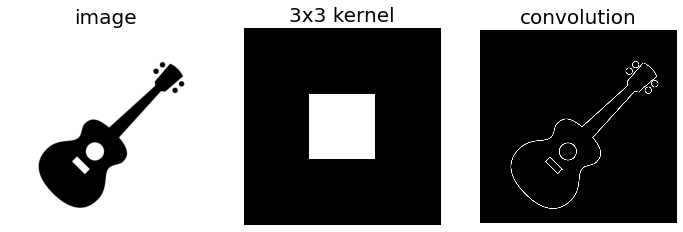

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d  

fname = "../../../coursedata/CNN/guitar.png" # file path
image = Image.open(str(fname)).convert("L")  # open image with python Image library
arr = np.asarray(image) # convert image to array

# define kernel values
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# perform convolution operation
conv_img = convolve2d(arr, kernel, mode='valid')

fig, axes = plt.subplots(1,3, figsize=(12,6))

axes[0].imshow(arr, cmap='gray')
axes[1].imshow(kernel, cmap='gray')
axes[2].imshow(conv_img, cmap='gray', vmin=0, vmax=50)

axes[0].set_title('image', fontsize=20)
axes[1].set_title('3x3 kernel', fontsize=20)
axes[2].set_title('convolution', fontsize=20)

[ax.axis("off") for ax in axes]

plt.show()

In contrast to dense layers, which learn global patterns in their input space (each neuron is connected to every input entry), convolutional layers aim at detecting **local patterns** (each neuron is connected to only its own receptive field). 
You will notice that convolutional layers are usually depicted differently than ordinary ANN to clearly illustrate convolution operation on the input image. Let's represent both layers in "unfolded" and "folded" modes, so you could see differences between them clearly.  

<img src="../../../coursedata/CNN/c5.png">

As we discussed the convolution is a feature extraction operation. The kernel learns the particular feature from the image. In order to learn multiple features in parallel for a given input, the convolution layer has many different kernels. 

In CNN, kernels are initialized randomly and become weights, which will be subsequently learned by the network. To update the weights of the convolutional layer we use the same iterative process of gradient-based learning as for a simple ANN, but the backpropagation step is a bit more complicated due to the presence of convolution operation.

The important thing to remember while doing a convolution operation is that the depth of a kernel should match that of the input depth. If you have an image of volume 3x3x3 as an input (where 3 represents 3 color channels: red, blue, and green), the kernel should also be of the same depth, for example, 2x2x3. 

Below the animation illustrates how the output is calculated for an MxNx3 image and 3x3x3 kernel. Note that the depth of the convolution kernel matches the depth of the image, both being 3. When the kernel is shifted to a particular location in the input image, it covers a small volume of the input (**receptive field**) and performs a convolution operation with this input. We sum up results of convolutions from all channels (plus bias term) for each location.


<img src="../../../coursedata/CNN/cnn.gif" width=1000>
<br>

As we said, the convolution layer has many different kernels and the activation maps from each kernel are stacked together along the depth dimension, thus creating the 3D output volume.

Below you can see an example of multi-filter (2 kernels, each of shape 2x2x3 ) multi-channel (3 channels, e.g., RGB) convolution operation. 

<img src="../../../coursedata/CNN/c4.png" width=1000>

Also, check [the following animation](https://cs231n.github.io/assets/conv-demo/index.html) where you can see an example of multi-filter (2 kernels, W0 and W1) multi-channel (3 channels, e.g., RGB) convolution operation. 

Here you can see yet another representation of the convolutional layer, to better understand its structure. Note that the convolutional layer has three dimensions. The depth of the conv layer depends on the number of kernels (here 2 kernels - depicted with dark brown and light brown colors). Each kernel in its turn has the same third dimension as the input. For example, if the input is a grayscale image, the kernel shape is (height x width x 1), while if the input is an RGB image, the kernel shape is (height x width x 3). Also note, that the neurons of the same "slice" are sharing the weights (so-called **parameter sharing**). E.g. all the "dark brown" neurons have the same kernel weights and bias, but different receptive field (they apply the kernel to different "patches" of the image). Thus, if the kernel is tuned to detect a specific pattern, this pattern will be detected at any location of the image, as all neurons of the same "slice" have the same kernel. In addition, this gives us significantly fewer weights for a given convolutional layer.

<img src="../../../coursedata/CNN/3dconv.png" width=700>

Similar to ANNs also CNNs can contain several successive layers. Such a deep CNN, consisting of many convolutional layers and pooling layers, tends to learn **spatial hierarchies**. A spatial hierarchy is formed by having the first convolutional layers (closer to the input) learn low-level patterns (concepts) such as corners, edges, or rectangles. The deeper layers (more close to the output) combine low-level patterns to form higher-level patterns (concepts) such as "dogs" or "cats".

### Zero Padding

Above we discussed kernels that traverse across the image by one pixel at a time. We call several pixels (or step size) by which kernel traversed in each slide a **stride**. \
Also, we saw that the size of the output from convolution operation, i.e feature map, is smaller than the input image size. This means that we are losing some pixel values around the perimeter of the image. Since CNN might consist of many convolutional layers, loss of pixels values in each successive convolution layer might result in a loss of important features from the image. To get the input-sized output, we employ a technique called **zero padding**. Padding is a technique in which we add zero-valued pixels around the image symmetrically. 

Below you can see an example of zero padding with size one.

<img src="../../../coursedata/CNN/padding.png" width=600>

In order to get the output volume of the same spatial dimension as input volume given the **stride=1**, we can find the size of zero padding needed with the following formula: 

<center> zero padding size = $\large\frac{(F-1)}{2}$, where $F$ is kernel size </center>

In general, the size of an output of a convolutional layer can be calculated with the following formula:

\begin{equation}
W_{out}\times H_{out}\times D_{out} = [\lfloor \frac{W_{in}+2P-F}{S} +1 \rfloor , \lfloor \frac{H_{in}+2P-F}{S} + 1 \rfloor, K]
\end{equation}

where:

- W - width
- H - height
- D - depth
- P - padding
- S - stride
- F - kernel size
- K - number of kernels
- $\lfloor x \rfloor$ - denotes the [floor function](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions), for example, $\lfloor 2.3 \rfloor = 2$

<a id='St2'></a>
<div class=" alert alert-warning">
    <h3><b>Student task.</b> Padding and stride.</h3>
        
Given:
    
- an input image of size 28x28 pixels, 
- network consisting of 3 convolutional layers and 
- kernel size 3x3 (F=3) with stride S=1 for all layers, 

select padding parameters such that the output of the network is 24x24. The input of the 1st conv layer is 28x28 image, the input of the 2nd conv layer is the output of 1st conv layer, etc.
    
Store the value of padding size for first convolutional layer in variable `pad_cv1`; for 2nd - in variable `pad_cv2`;  for last - in variable `pad_cv3`.   
</div>

In [8]:
from math import floor  # floor function, use as floor(...)

# YOUR CODE HERE

pad_cv1 =  0
pad_cv2 =  0
pad_cv3 =  1

In [9]:
# this cell is for tests


<div class="wrap-up">
    <div class="wrap-up-title">Wrap up</div><br>
    <div class="wrap-up-content">
        <ul>
          <li>Conv layer learns local patterns </li>
          <li>Conv layer has following hyperparameters:</li>
                <ul>
                      <li>Number of kernels - K</li>
                      <li>Kernel size - F</li>
                      <li>Stride - S </li>
                      <li>Zero padding size - P</li>
                </ul>
          <li>Conv layer accepts the input volume of size:  $W_{in}$x$H_{in}$x$D_{in}$</li>
          <li>and outputs the volume of size: $W_{out}$x$H_{out}$x$D_{out}$</li>
            <br>
          where 
            $W_{out}$x$H_{out}$x$D_{out}$ = $[\lfloor \frac{W_{in}+2P-F}{S} +1 \rfloor , \lfloor \frac{H_{in}+2P-F}{S} + 1 \rfloor, K]$
        </ul>
    </div>
</div>

### Pooling Layer

Another important building block of CNN is a [pooling layer](https://keras.io/api/layers/pooling_layers/). Pooling layers take activation maps as its input and return sub-sampled activation maps. Pooling operation greatly reduces the number of weights in the network and, thus, prevents overfitting of the network. 

Two of the most common pooling operations are:

- Max pooling
- Average pooling

Similar to the function of a convolution layer, a pooling layer amounts to applying the same operation to small areas (patches) of an image. In contrast to convolutional layers, this operation is a pooling operation. The outputs of a max pooling layer are the largest values of the corresponding (small) patch of the input. In contrast, the output in average pooling layers is obtained by the (local) average over all entries in the corresponding patch of the input.  

Below is a visualization of the max pooling operation. 

Max pooling with a kernel size of 2 and stride 1. We take the largest value from the window of the activation map overlapped by the kernel.

<img src="../../../coursedata/CNN/max1.png" width=350>

Similar to convolution operation, we move kernel with step size 1, until we get complete max pooled activation map.
<img src="../../../coursedata/CNN/max2.png" width=350>

<div class="wrap-up">
    <div class="wrap-up-title">Wrap up</div><br>
    <div class="wrap-up-content">
        <ul>
          <li>Pooling layer reduces the number of parameters</li>
          <li>Pooling layer has following hyperparameters:</li>
                <ul>
                      <li>Kernel size - F</li>
                      <li>Stride - S </li>
                </ul>
            <li>It does not have learnable parameters (it just performs maxout operation or averaging) </li>    
            <li>It accepts the input volume of size:  $W_{in}$x$H_{in}$x$D_{in}$</li>
            <li>It outputs the volume of size: $W_{out}$x$H_{out}$x$D_{out}$</li>
            <br>
             where 
            $W_{out}$x$H_{out}$x$D_{out}$ = $[\lfloor \frac{W_{in}-F}{S} + 1 \rfloor,\lfloor \frac{H_{in}-F}{S} + 1 \rfloor, D_{in}]$
        </ul>
    <p>
    Max pooling is used much more often than average pooling and two most common hyperparameter choices are F=3, S=2, and F=2, S=2 (later one being even more common) 
<a href='https://www.youtube.com/watch?v=8oOgPUO-TBY'>[1]</a>
<a href='https://cs231n.github.io/convolutional-networks/#pool'>[2]</a>.
    </p>
    </div>
</div>

A convolution layer followed by a pooling layer provides so called **invariance** property of CNN. This means that local patterns are "detected" even after some transformation (translation, rotation, scaling) of the input. For example, in the image below, you can see how the number five induces a large response in the network, despite slight rotation. Here, three kernels learned to match a slightly different orientation of the five. In the first case, the input matches the first kernel and results in the large values of the activation map, while in the second case rotated image matches the third kernel. In either case, pooling of activation maps will result in a large response (values). Read more in the [Deep Learning book](https://www.deeplearningbook.org/contents/convnets.html).

<img src="../../../coursedata/CNN/translinv.png" width=500>

### Fully-Connected layer

In this layer, the feature map from the last convolution or pooling layer is flattened into a single vector of values and fed into a fully connected layer. Fully connected layers are the same as in ANN we saw before and perform the same mathematical operations. After passing through the fully connected layers, the final layer uses the softmax activation function which gives the probabilities of the input belonging to a particular class.

<img src="../../../coursedata/CNN/fully_connected.png" width=550>

### Number of parameters in CNN layer

Deep learning models learn hundreds of thousands of parameters (weights and biases). Knowing the total numbers of learnable parameters helps to determine the required sample size (number of training data points) in order to avoid overfitting. 
For CNN we can calculate the number of learnable parameters in each layer as follows:

$\text{Number of params}  = (kernel\_ width * kernel\_height * channels\_in + 1 \text{ (for bias))} * channels\_out$

In the typical CNN, the spatial volume of the output decreases while the number of the kernels learned increases as we go deeper into the network. The convention is to choose the number of kernels equal to powers of 2 (e.g. $2^5=32$, $2^6=64$), and kernel size to be an odd integer value (e.g. 3 or 5).

Using the above formula, let's calculate the numbers of parameters in the convolutional layers.

<a id='St5'></a>
<div class=" alert alert-warning">
    <h3><b>Student task.</b> Compute number of parameters.</h3>
<p>Given:</p>

- an input image of size 28x28 pixels (grayscale), 
- network consisting of 3 convolutional layers with parameters: </br>
    
     conv1: kernel size=(3x3), number of kernels=16 </br>
     conv2: kernel size=(3x3), number of kernels=32 </br>
     conv3: kernel size=(3x3), number of kernels=64 </br>
    
Compute the total number of parameters (including biases) and store them in the variable `params_num`.      
</div>

In [11]:
params_num =  ((3*3*1  + 1) * 16) + ((3*3*16 + 1) * 32) + ((3*3*32 + 1) * 64)

print("Total number of parameters is", params_num)

Total number of parameters is 23296


In [12]:
# this cell is for tests


## Building and training CNN in Keras

Since CNN is a special case of an ANN, applying a CNN follows the same usage pattern as for an ANN:

1. Load the data. 
2. Define the hypothesis space (model) by choosing a network structure. 
3. Configure the learning process by choosing a loss function and an optimizer. 
4. Train a model to find good choices for network parameters (weights and bias).  

In [13]:
import tensorflow as tf                               # tensorflow library provides functions for deep neural networks 
from tensorflow.keras.datasets import fashion_mnist   # to load the fashion mnist data set
import matplotlib.pyplot as plt                       # provides functios to visualize data
import numpy as np                                    # provides functions for matrix computations
from sklearn.metrics import classification_report     # function for computing classification metrics 

# for reproducibility 
np.random.seed(1)
tf.random.set_seed(1)

### Step 1 - Dataset

Here we use [Fashion-MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset, where each data point is represented by a grayscale image of size 28x28 pixels. Each image represents a specific fashion item and each data point is associated with a label taking on values $y=0,\dots,9$ according to 10 different classes.

Dataset is retrieved by using the command 

```python
>>> tf.keras.datasets.fashion_mnist.load_data()
```

We can split dataset on training and validation sets automatically by using argument `validation_split` of keras `fit()` function:

```python
>>> model.fit(train_images, train_labels, validation_split=0.2, epochs=20)
```

We can also define training and validation sets by using argument `validation_data`:

```python
>>> model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=20)
```

To use this method, let's define our training and validation subsets and scale values.    

<a id='St3'></a>
<div class=" alert alert-warning">
    <h3><b>Student task.</b> Load the dataset.</h3>
        
Your task is to load the Fashion-MNIST dataset using `tf.keras.datasets`. We will use only part of the dataset in order to reduce CNN training time.
    
- When loading dataset with `tf.keras.datasets`, training and test sets are returned. You need to split the training set further into training and validation subsets. 
- Out of the whole training set (60.000 samples), choose the first 10.000 images and labels for the training dataset and the next 6.000 samples for the validation dataset. 
- Store features and labels in numpy arrays `X_train, y_train` & `X_val, y_val`.
- Scale feature values (divide by max pixel value 255).
    
The shape of datasets should be ($m$, IMG_HEIGHT, IMG_WIDTH, 1), where $m$ is the sample size and last dimension is for image channel (1 for grayscale and 3 for RGB).
</div>

In [14]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# YOUR CODE HERE
#raise NotImplementedError()

# load dataset
(X_trainval, y_trainval), (X_test, y_test) = fashion_mnist.load_data()

# split trainval set into  training and validation datasets (X_train,y_train) & (X_val, y_val)
# scale feature values 
X_train = X_trainval[:10000]/255
y_train = y_trainval[:10000]

X_val = X_trainval[10000:16000]/255
y_val = y_trainval[10000:16000]

# scale test set 
X_test = X_test/255

# reshape features to specify number of channels (one for grayscale images and three for RGB)
# as last dimension: (n_samples, height, width, channels)

X_train = X_train.reshape(10000, 28, 28, 1)
X_val   = X_val.reshape(6000, 28, 28, 1)
X_test  = X_test.reshape(10000, 28, 28, 1)


# shape of train, validation and test datasets
print(f'Number of training examples: {X_train.shape}')
print(f'Number of validation examples: {X_val.shape}')
print(f'Number of test examples: {X_test.shape}')

Number of training examples: (10000, 28, 28, 1)
Number of validation examples: (6000, 28, 28, 1)
Number of test examples: (10000, 28, 28, 1)


In [15]:
# Perform some sanity checks on the solution
assert X_train.shape == (10000, 28, 28, 1), "The shape of X_train is incorrect!"
assert X_val.shape == (6000, 28, 28, 1), "The shape of X_val is incorrect!"
assert X_test.shape == (10000, 28, 28, 1), "The shape of X_test is incorrect!"

print("Sanity checks passed!")

Sanity checks passed!


In [16]:
# cell for hidden test


In [17]:
# hidden test


In [18]:
# hidden test


### Step 2: Choose CNN Architecture (Hypothesis Space)


We use <b>Conv2d Keras</b> class to define convolutional layer:  `tf.keras.layers.Conv2D(params)`.\
We are going to set following parameters:

    
- `filters`:  the number of kernels the layers will learn; the dimensionality of the output space (i.e. the number of output channels).

- `kernel_size`: an integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window size. Can be a single integer to specify the same value for all spatial dimensions.

- `padding`: types of padding to apply; one of "valid" or "same" (case-insensitive). "valid" means no padding, thus spatial dimension will be reduced. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

- `activation`: string specifying the activation function to apply after performing the convolution.

Similarly, we apply max pooling in our pooling layer by using <b>MaxPool2D</b> class: `tf.keras.layers.MaxPool2D(args)`. The parameter we set in this layer is:
- `pool_size` - determines the kernel size 

Conv2d and and MaxPool2d have some more optional parameters to define, read more [here](https://keras.io/api/layers/convolution_layers/convolution2d/) and [here](https://keras.io/api/layers/pooling_layers/max_pooling2d/). 

To connect the output of conv layers with dense layer, we can automatically flatten the input by calling `tf.keras.layers.Flatten()` ([docs](https://keras.io/api/layers/reshaping_layers/flatten/)). You can find information about other layers provided by Keras [here](https://keras.io/api/layers/).

We will also use the optional parameter `name` to give a name to each of the layers, as we will need to identify layers during testing your model architecture.

<a id='St4'></a>
<div class=" alert alert-warning">
    <h3><b>Student task.</b> Build a CNN.</h3>
        
Your task is to build a Convolutional Neural Network using sequential API from Keras. [Here](https://keras.io/guides/sequential_model/) you can find some examples of using sequential API.
    
CNN should consist of the following layers:
    
   - **conv layer** with 16 kernels of size 3x3 and activation function ReLU. 
       The output of this layer should have the same height/width dimension as the input.
       For the first convolutional layer, you also need to indicate the appropriate input shape (param `input_shape`).
       You should name this layer 'cv1'. 

   - **conv layer** with 16 kernels of size 3x3 and activation function ReLU. 
       The output of this layer should have the same height/width dimension as the input.
       You should name this layer 'cv2'.

   - **max pooling layer** with kernel size 2x2.
       You should name this layer 'maxpool'.

   - **flattening layer**
       You should name this layer 'flatten'.

   - **dense layer** with 64 units and activation function ReLU. 
       You should name this layer 'dense'.

   - **dense output layer** with 10 units and softmax activation function.
       You should name this layer 'output'.
    
</div>

<div class="info">
    <div  class="info-title"><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</div><br>
    <div class="wrap-up-content">You can verify the architecture of CNN by printing out a summary of your model with <code>model.summary()</code>. In addition, it will automatically compute the number of the model's parameters.<br><br>There is another useful function which allows to inspect model visually - <code>tf.keras.utils.plot_model</code> <a href="https://keras.io/api/utils/model_plotting_utils/">docs</a>. It plots the graph of the model and saves it to the file, e.g.:
   
```python
>>> tf.keras.utils.plot_model(
                              model, 
                              show_shapes=True, 
                              show_layer_names=True
                             )
```

</div>   
</div>

2022-11-19 12:25:55.798648: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Fontconfig error: Cannot load default config file: No such file: (null)



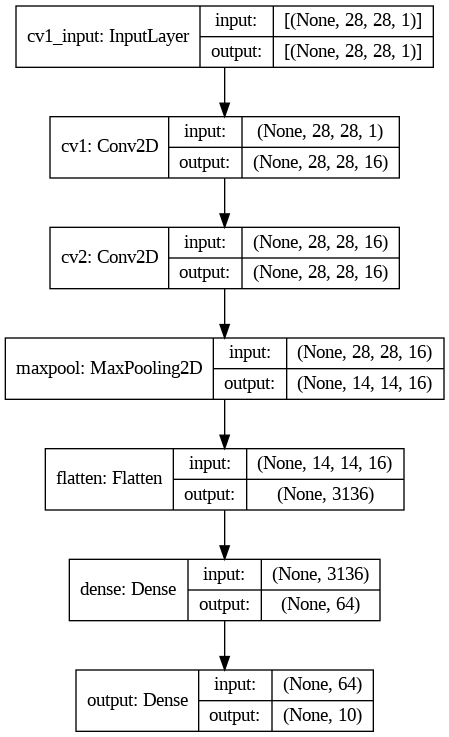

In [19]:
# YOUR CODE HERE

# define the model architecture using Sequential API
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu", padding="same", input_shape = (28,28, 1), name="cv1"))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu", padding="same", name="cv2"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool"))
model.add(tf.keras.layers.Flatten(name="flatten"))
model.add(tf.keras.layers.Dense(units=64, activation='relu', name="dense"))
model.add(tf.keras.layers.Dense(units=10, activation='softmax', name="output"))

tf.keras.utils.plot_model(
                              model, 
                              show_shapes=True, 
                              show_layer_names=True
                             )

In [20]:
# Perform some sanity checks on the solution
assert len(model.layers) == 6, "There should be 6 layers!"
assert model.layers[0].input_shape[1:] == (28,28,1), "Input shape is wrong"
assert model.layers[0].output_shape[1:] == (28,28,16), "Output shape is wrong"

print("Sanity checks passed!")

Sanity checks passed!


In [21]:
# this cell is for tests


### Step 3 - Compile a model (here we choose a loss function)

In order to find optimal values for the CNN weights, we use `sparse_categorical_crossentropy` loss function. 

<div class="info">
    <div  class="info-title"><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</div><br>
    <div class="wrap-up-content">
        We use <code>categorical_crossentropy</code> loss function for multiclass classification & when labels are provided in one-hot representation. Use <code>sparse_categorical_crossentropy</code> when you want to provide labels as integers.

What are the differences? In principle none, as they both compute categorical cross-entropy, but read more <a href="https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c">here</a>.
    </div>   
</div>

<a id='St5'></a>
<div class=" alert alert-warning">
    <h3><b>Student task.</b> Compile the model.</h3>
        
Your task is to compile a model with `sparse_categorical_crossentropy` loss, RMSprop optimizer, and `sparse_categorical_accuracy` as metrics.

You can specify optimizer RMSprop as follows: `optimizer='RMSprop'` or `optimizer=tf.keras.optimizers.RMSprop`.

RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD) because RMSprop automates learning rate tuning. Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training and would work equally well here.
    
</div>

In [22]:
# YOUR CODE HERE-
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='RMSprop',
              metrics=["accuracy"])

In [23]:
# this cell is for tests


In [24]:
# hidden test


### Step 4 - Train the network

Train CNN for about 20 epochs - this may take some minutes to run.

Loss and accuracy are good indicators of learning progress. The model makes predictions for the training data and then the loss is calculated comparing the predictions against the known labels, and accuracy, which is the proportion of correct guesses.

<a id='St6'></a>
<div class=" alert alert-warning">
    <h3><b>Student task.</b> Train the model.</h3>
        
Your task is to [train a model](https://keras.io/api/models/model_training_apis/#fit-method).
    
- Use training and validation datasets (batch size=32). 
- Check accuracy of a trained model on a test dataset by calling [`evaluate` method](https://keras.io/api/models/model_training_apis/#evaluate-method). Use batch_size=128 parameter.
- Save your model as `model.save('model.h5')`.
    
</div>

<div class=" alert alert-danger">
    <h3 align='center'><b>Accuracy on a test set should be $\geq$ 0.85</b></h3>
</div>

In [26]:
# set trainig=False when validating or submitting notebook
# and set training=True, when training network
training=False

In [27]:
# this hidden cell is for setting flag training=False


In [28]:
%%time 
if training:
        
# YOUR CODE HERE
    # use .fit() method to train a model
    # use X_train, y_train for training and
    # X_val, y_val as validation set
    # history = ...
    # training the network (~40 min on CPU, ~5 min on Colab GPU)
    history = model.fit(X_train, y_train, epochs=20, batch_size=32,validation_data=(X_val, y_val))
    model.evaluate(X_test,y_test, batch_size=128)
    model.save('model.h5')
else: 
    model = tf.keras.models.load_model("model.h5")

CPU times: user 588 ms, sys: 767 ms, total: 1.36 s
Wall time: 2min 24s


In [29]:
import pandas as pd

if training:
    # plot training log
    pd.DataFrame(history.history).plot(figsize=(6,4))
    plt.grid(True)
    plt.show()

In [30]:
# this cell is for tests


## Visualizing the activation maps of  convolutional layers

In this section we plot the activation maps of a particular CNN layer ([docs](https://keras.io/getting_started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer-feature-extraction)). Visualizing the activation of individual layer helps to understand how the input is decomposed into some relevant pixel patterns within an image or in other words, what local patterns the layer is learning. 

The idea is to select the specific layer(s) of the trained model (with tuned weights), pass input, and get outputs of the selected layer(s). In order to manipulate specific layers of a model, we need to use a more flexible API. [Functional API](https://keras.io/guides/functional_api/) allows to build complex models and manipulate over selected layers.

In contrast to Sequential model, with Functional API we can create models with multiple inputs and outputs and complex graph topologies. Below is an example of a model with concatenated layers, created with Functional API. 

Fontconfig error: Cannot load default config file: No such file: (null)



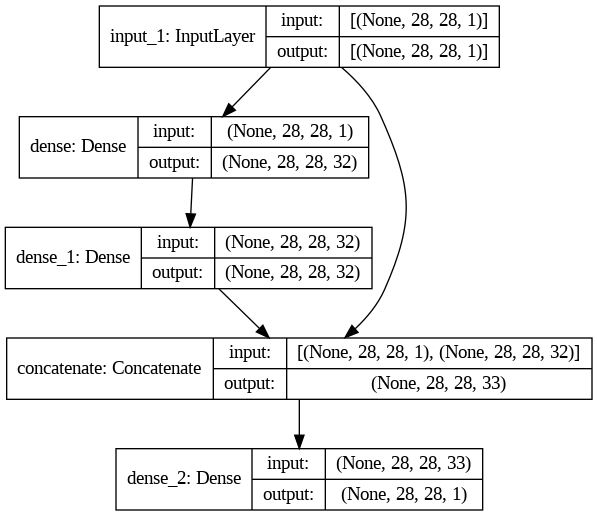

In [31]:
# define input layer
in_layer = tf.keras.layers.Input(shape=X_train.shape[1:])

# define hidden layers and its inputs as
# current_layer = tf.keras.layers.Dense(*args)(previous_layer)
hidden_1 = tf.keras.layers.Dense(32, activation='relu')(in_layer)
hidden_2 = tf.keras.layers.Dense(32, activation='relu')(hidden_1) 

# combine two inputs
concat   = tf.keras.layers.Concatenate()([in_layer, hidden_2]) 
# define output layer
out      = tf.keras.layers.Dense(1, activation='relu')(concat) 

# define model with functional API
model_Func_API = tf.keras.Model(inputs=[in_layer], outputs=[out])

# plot graph
tf.keras.utils.plot_model(
    model_Func_API, 
    show_shapes=True, 
    show_layer_names=True
    )

In our case, we are analyzing an already existing trained model therefore we use input and output layers defined in that model:

In [32]:
# input layer
in_layer = model.input
# all other layers
layers = [layer.output for layer in model.layers]

# create a model with functional API
activation_model = tf.keras.models.Model(inputs = in_layer, outputs = layers)

We have the **same** model as before, but now we can pass the input and access output of each layer separately. With Sequential API we were only able to see the output of the last layer. Let's pass some input to the model:

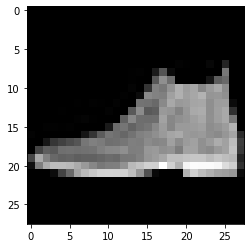

In [33]:
# this is the image whose feature map we will visualize
plt.imshow(X_test[0], cmap='gray')
plt.show()

# pass input and get feature maps of the image
activation = activation_model(X_test[0].reshape(1, 28, 28, 1))

This is how we can retrieve feature maps of the first convolution layer:

In [34]:
first_layer_activation = activation[0] 
print(first_layer_activation.shape)

(1, 28, 28, 16)


The outputs of the first convolution layer are activation maps of size $28 \times 28 \times 16$. There are $16$ activation maps that correspond to the different kernels we apply to the input image. The code snippet below displays activation maps of the first convolutional layer. 

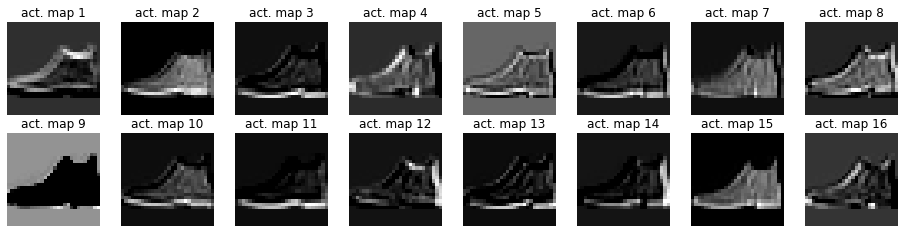

In [35]:
# visuale activation maps of the first convolutional layer
plt.figure(figsize=(16,16))

for i in range(first_layer_activation.shape[-1]):
    plt.subplot(8,8,i+1)
    plt.axis('off') # remove ticks
    plt.imshow(first_layer_activation[0, :, :, i], cmap='gray')
    plt.title('act. map '+ str(i+1))

plt.show()

Each kernel encodes relatively independent features of the input image. We can see that the first convolutional layer has learned lower-level features/patterns from the image, such as various edges. 

Now, let's go deeper into the network and select activation maps after max pooling.

In [36]:
third_layer_activation = activation[2] 
print(third_layer_activation.shape)

(1, 14, 14, 16)


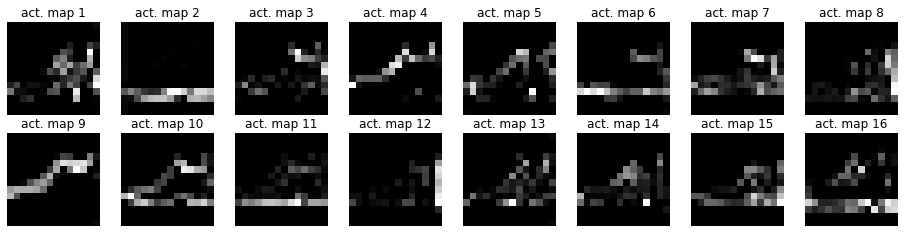

In [37]:
# visuale activation maps of after max pooling layer
plt.figure(figsize=(16,16))

for i in range(third_layer_activation.shape[-1]):
    plt.subplot(8,8,i+1)
    plt.axis('off') # remove ticks
    plt.imshow(third_layer_activation[0, :, :, i], cmap='gray')
    plt.title('act. map '+ str(i+1))

plt.show()

Activations from deeper layers reveal that as we go deeper into the network, the features learned becomes less visually interpretable, meaning encoding the higher-level feature/pattern of an object.

You can plot activation maps for different clothing categories and check if those will be different from what we observe here.

##  Accuracy Prediction on Test Set 

We can also inspect which items the CNN predicted incorrectly. Sometimes it is useful to manually check which type of images are misclassified as this might give a hint on how to improve the model.

In [38]:
# get predicted probabilities for all 10 classes
predicted_proba = model(X_test.reshape(-1,28,28,1))

# get index of a class with highest probability
predicted_classes  = np.argmax(predicted_proba, axis=-1)

In [39]:
# get the total correct and incorrect prediction from the predict class
correct = np.nonzero(predicted_classes == y_test)[0]
incorrect = np.nonzero(predicted_classes != y_test)[0]

print("Correct predicted classes:", correct.shape[0])
print("Incorrect predicted classes:", incorrect.shape[0])

Correct predicted classes: 8809
Incorrect predicted classes: 1191


In [40]:
# map each images labels to item name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Below we use `classification_report` function from sklearn to make a text report showing the main classification metrics:

In [41]:
target_names = [f"Class {i} ({class_names[i]}) :" for i in range(10)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.83      0.85      0.84      1000
    Class 1 (Trouser) :       0.97      0.98      0.97      1000
   Class 2 (Pullover) :       0.84      0.80      0.82      1000
      Class 3 (Dress) :       0.92      0.85      0.88      1000
       Class 4 (Coat) :       0.79      0.85      0.82      1000
     Class 5 (Sandal) :       0.98      0.92      0.95      1000
      Class 6 (Shirt) :       0.67      0.70      0.69      1000
    Class 7 (Sneaker) :       0.92      0.95      0.94      1000
        Class 8 (Bag) :       0.96      0.95      0.96      1000
 Class 9 (Ankle boot) :       0.94      0.97      0.95      1000

               accuracy                           0.88     10000
              macro avg       0.88      0.88      0.88     10000
           weighted avg       0.88      0.88      0.88     10000



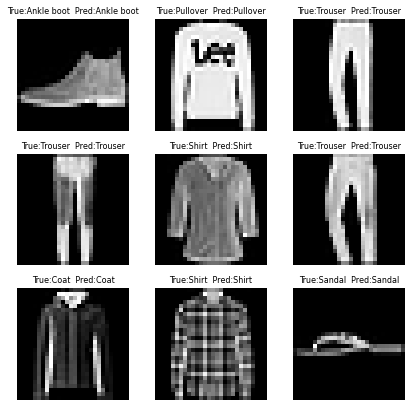

In [42]:
def plot_images(data_index):
    '''
        This is a function to plot first 9 images.    
        data_index: indices of images.
    
    '''
    # plot the sample images 
    f, ax = plt.subplots(3,3, figsize=(7,7))

    for i, indx in enumerate(data_index[:9]):
        ax[i//3, i%3].imshow(X_test[indx].reshape(28,28), cmap='gray')
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title("True:{}  Pred:{}".format(class_names[y_test[indx]],class_names[predicted_classes[indx]]), fontsize=8)
    plt.show()    

# display correctly classified images
plot_images(correct)

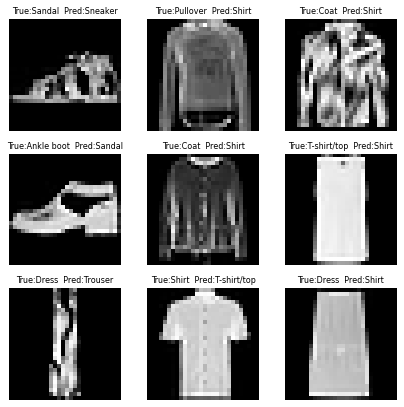

In [43]:
# display incorrectly classified images
plot_images(incorrect)

<h1><center>CNN in the real life</center></h1>

<h2>Tesla Autopilot</h2>
<img src="https://media0.giphy.com/media/H7rpSYHRyYgamxQNqw/giphy.gif?cid=ecf05e47nlvqm3fsj7afzjxq2ajephtz1o0rwjts7l8lddpg&rid=giphy.gif&ct=g" width="520" height="300" align="right" style="margin-left:25px;"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/Tesla_T_symbol.svg" width="64" height="64" align="left" style="margin-right:15px;"></img>

[Tesla](https://www.tesla.com) is an American car manufacturer with the mission to accelerate the world's transition to sustainable energy. They produce electric cars that are efficient, beautiful and above all, powerful computing machines. You may have seen promotional videos of the Teslas driving by themselves (check this one [Full Self-Driving](https://www.youtube.com/watch?v=tlThdr3O5Qo)), a feature called [Autopilot](https://www.tesla.com/autopilot).

To be able to have a reliable autopilot, they need to process a lot of information in real-time: speed, traffic signs, road conditions, presence of pedestrians, etc.  As you may have inferred, this requires a lot of image processing. At its core, they use the convolutional layers studied in this round but with modifications in the architecture of the network.

The details of their neural network architecture is beyond the scope of this Introduction to Deep Learning, but if you are curious about the theory behind Tesla's success, you can read these papers, both of them available through Aalto's library:

* He, K., Zhang, X., Ren, S. and Sun, J., 2016. **Deep residual learning for image recognition**. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).

* Radosavovic, I., Kosaraju, R.P., Girshick, R., He, K. and Dollár, P., 2020. **Designing network design spaces**. In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (pp. 10428-10436).

A more detailed explanation is given by [Andrej Karpathy](https://karpathy.ai/), lead of the computer vision team of the Autopilot in the conference [Tesla AI Day](https://www.youtube.com/watch?v=j0z4FweCy4M&t=2924s).

<h2>Pinterest Shop The Look</h2>

<img src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pinterest-logo.png" width="64" height="64" align="left" style="margin-right:15px;"/>

<img src="https://media0.giphy.com/media/l4FGyfggJVpjOaTks/giphy.gif?cid=790b761114cc9a89d47285a139de860555649b72a9d02c69&rid=giphy.gif&ct=g" align="right" style="margin-left:15px;" width="230" />

[Pinterest](https://www.pinterest.com/) is an American image sharing and social media service designed to enable saving and discovery of information on the internet by using images. It has a large user base, with over 478 million monthly active users globally as of March 2021 <sup>[[1](https://www.socialmediatoday.com/news/pinterest-rises-to-478-million-users-posts-strong-revenue-result-for-q1/599166/)]</sup>. Among its many features, there is one that allows you to search and buy items similar to the ones found in your pins (images) called [Shop The Look](https://newsroom.pinterest.com/en/post/introducing-the-next-wave-of-visual-search-and-shopping). In the blog post [Automating Shop the Look on Pinterest](https://medium.com/pinterest-engineering/automating-shop-the-look-on-pinterest-a17aeff0eae2), they explain how having a human doing the manual work of matching image and product links didn't scale given the large number of images in their platform.
To overcome this situation, they trained a Feature Pyramid Network Faster R-CNN detection model that parses scenes into objects and annotates them with product categories. This process was divided into three stages:

1. Data collection: pre-processing step needed to ensure high quality data
2. Machine learning (ML) modeling: train the model to identify and localize home decor objects in a scene. Once trained, the model will classify the objects into categories and it will represent them as [embeddings](https://arxiv.org/pdf/1811.12649.pdf). This representation makes the search for similar images easier.
3. Model serving: take the user image and make suggestions as shown in the animation on the right.

You can find the theory behind the neural network used to implement this feature in the papers:
* Shaoqing Ren et al. (2017) **Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks**. IEEE transactions on pattern analysis and machine intelligence. [Online] 39 (6), 1137–1149.
* Lin TY, Dollár P, Girshick R, He K, Hariharan B, Belongie S. **Feature pyramid networks for object detection**. InProceedings of the IEEE conference on computer vision and pattern recognition 2017 (pp. 2117-2125).
* R. Girshick, J. Donahue, T. Darrell and J. Malik, **Rich Feature Hierarchies for Accurate Object Detection and Semantic Segmentation**, 2014 IEEE Conference on Computer Vision and Pattern Recognition, 2014, pp. 580-587, doi: 10.1109/CVPR.2014.81.


<h2>Facebook</h2>

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Facebook_icon_2013.svg" width="100" height="100" align="left" style="margin-right:15px;"/>


[Facebook](https://www.facebook.com/) is an American online social media and social networking service founded by Mark Zuckerberg in 2004. The [Facebook, Inc.](https://about.facebook.com/company-info/) company owns many products present in our daily life: [Instagram](https://www.instagram.com/), [Messenger](https://www.messenger.com/), [Whatsapp](https://www.whatsapp.com/?lang=en), [Oculus](https://www.oculus.com/), [Novi](https://www.novi.com/). Image processing is at the core of Facebook: image classification, image captioning, image-based search, etc. In the website [Facebook AI](https://ai.facebook.com/) you will find several papers, tools and articles explaining the company's usage of Machine Learning.

The usage of CNN is everywhere, for example, Instagram uses it for their [Explore recommender system](https://ai.facebook.com/blog/powered-by-ai-instagrams-explore-recommender-system/). [Facebook Marketplace](https://www.facebook.com/marketplace) combines image processing and Natural Language Processing for the recommendation system. They use a video and image understanding platform called [Lumos](https://engineering.fb.com/2017/02/02/ml-applications/building-scalable-systems-to-understand-content/) which helps them answer questions like "What is in the image?" and "Where are the objects?".

You can read a more detailed explanation in this article: [Under the hood: Facebook Marketplace powered by artificial intelligence](https://ai.facebook.com/blog/under-the-hood-facebook-marketplace-powered-by-artificial-intelligence/)

</br>
<h2><strong>The sky's the limit</strong></h2>

There are many other companies using the basic building blocks of CNN studied in this round. There are many libraries and frameworks available like the [NVIDIA DRIVE®](https://www.nvidia.com/en-us/self-driving-cars/drive-videos/) <sup>[[1](https://developer.nvidia.com/drive/downloads)]</sup> for autonomous driving or [Facebook's Detectron2](https://github.com/facebookresearch/detectron2) for object detection, segmentation and other visual recognition tasks. Now you have the foundations for understanding the basics of all those systems and for applying CNN to a new revolutionary product! 

## Quiz

<div class=" alert alert-warning">
     <h3><b>Question 3.1.</h3>

Each convolutional layer is characterized by the parameters "padding" P and "stride" S. Choose a correct statement:

1. Increasing the value of padding P results in a smaller output. 

2. Increasing the stride S results in a smaller output. 

3. Increasing the stride S results in a larger output. 
         
</div>

In [81]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
answer_31  = 2

In [82]:
# This cell is for tests
assert answer_31 in [1,2,3], '"answer" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


Sanity check tests passed!


<div class=" alert alert-warning">
     <h3><b>Question 3.2.</h3>

Choose the correct statement:

1. The first layers (closer to the input) of CNN tend to learn complex features (such as the presence of a particular dog species). 

2. The first layers (closer to the input layer) of CNN tend to learn low-level features (such as the presence of edges or corners in the image). 

3. The last layers (further to the input layer) of CNN tend to learn low-level features (such as the presence of edges or corners in the image). 
         
</div>

In [ ]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE

answer_32  = 2

In [ ]:
# This cell is for tests
assert answer_32 in [1,2,3], '"answer" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


<div class=" alert alert-warning">
     <h3><b>Question 3.3.</h3>

Assume we apply a single convolutional layer to a grayscale image of size 128 by 128 pixels. What is the padding size needed to preserve the input size if we use stride=1 and a kernel size=3?

Select one:

1. padding is not needed

2. padding=1

3. padding=2

4. padding=3
</div>

In [ ]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
answer_33  = 2

In [ ]:
# This cell is for tests
assert answer_33 in [1,2,3,4], '"answer" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


<div class=" alert alert-warning">
     <h3><b>Question 3.4.</h3>

Consider a convolutional layer with input shape (32,32,3), i.e., the input is images of 32 by 32 pixels and each pixel is characterized by 3 channels. The convolutional layer is configured with stride=1, padding=1, kernel size=5 and number of kernels=12. What is the shape of the output computed by the convolutional layer?
Select one:

1. (29,29,3)

2. (29,29,12)

3. (30,30,12)

4. (28,28,3)
         
</div>

In [84]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
answer_34  = 3

In [85]:
# This cell is for tests
assert answer_34 in [1,2,3,4], '"answer" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


Sanity check tests passed!


<div class=" alert alert-warning">
     <h3><b>Question 3.5.</h3>


What is the number of tunable parameters (including bias) in a convolutional layer whose input shape is (32,32,3), kernel size is 3×3 and the number of kernels is 12?

Select one:

1. 336

2. 42

3. 3072

4. 324
         
</div>

In [ ]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
answer_35  = 1

In [ ]:
# This cell is for tests
assert answer_35 in [1,2,3,4], '"answer" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')
